In [1]:
import numpy as np
import pandas as pd
import altair as alt
from altair import datum

In [2]:
data = pd.read_excel("Data/Ne phase shift diffs.xlsx", sheet_name=None)

for k, df in data.items():
    if "KE (eV)" in df:
        df["KE (eV)"] = df["KE (eV)"].apply("{:.1f}".format)
    if k == "TDCASSCF":
        where = ((df["Group"].isin({"G1430", "G1590", "G1910"}))
                 & (df["Config"] == "sum[m]"))
        df.where(where, inplace=True)
        
data["Measured"].head()

,Dataset,Dataset / KE (eV),Photon energy (eV),KE (eV),Config,Polar ang fr (deg),Polar ang to (deg),Polar ang (rad),Polar ang (deg),Phase shift diff (rad),Phase shift diff (deg),Phase shift diff err (rad),Phase shift diff err (deg),Phase shift diff fr (deg),Phase shift diff to (deg),Phase mod,Unwrapped (rad),Unwrapepd (deg)
0,good1,7.2,15.9,7.2,sum[m],0,5,0.043633,2.5,0.970825,55.624165,0.089057,5.102609,50.521557,60.726774,0,0.970825,55.624165
1,good1,7.2,15.9,7.2,sum[m],5,10,0.130900,7.5,1.210234,69.341298,0.096733,5.542411,63.798887,74.883708,0,1.210234,69.341298
2,good1,7.2,15.9,7.2,sum[m],10,15,0.218166,12.5,1.003316,57.485799,0.072731,4.167181,53.318618,61.652980,0,1.003316,57.485799
3,good1,7.2,15.9,7.2,sum[m],15,20,0.305433,17.5,1.219222,69.856297,0.061948,3.549380,66.306917,73.405677,0,1.219222,69.856297
4,good1,7.2,15.9,7.2,sum[m],20,25,0.392699,22.5,1.113591,63.804061,0.116181,6.656709,57.147352,70.460770,0,1.113591,63.804061


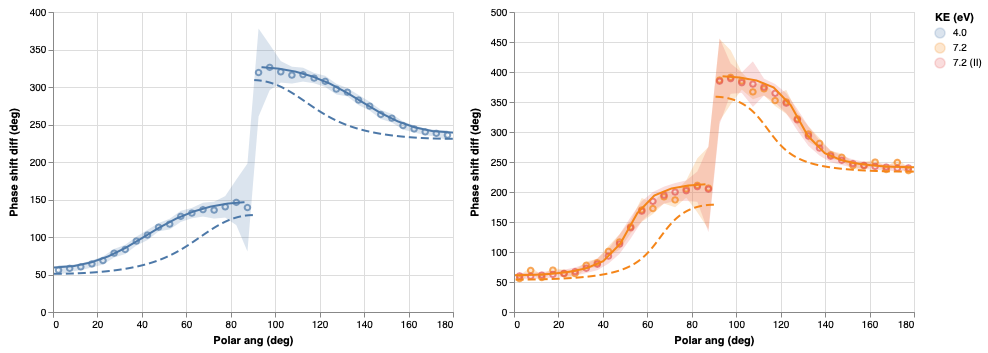

In [3]:
base = {k: alt.Chart(data[k]) for k in ("Measured", "TDCASSCF", "Perturb")}

chart = alt.hconcat()
for ke in ("4.0", "7.2"):
    fig = (
        base["Measured"].mark_area(opacity=0.2).encode(
            x="Polar ang (deg):Q",
            y=alt.Y("Phase shift diff fr (deg):Q", axis=alt.Axis(title="Phase shift diff (deg)")),
            y2="Phase shift diff to (deg):Q",
            color=alt.Color("Dataset / KE (eV):N", title="KE (eV)"),
        ).transform_filter(datum["KE (eV)"] == ke)
        + base["Measured"].mark_point().encode(
            x="Polar ang (deg)",
            y="Phase shift diff (deg)",
            color=alt.Color("Dataset / KE (eV):N", title="KE (eV)"),
        ).transform_filter(datum["KE (eV)"] == ke)
        + base["TDCASSCF"].mark_line().encode(
            x="Polar ang (deg):Q",
            y="Phase shift diff (deg):Q",
            color="KE (eV):N",
        ).transform_filter(datum["KE (eV)"] == ke)
        + base["Perturb"].mark_line(strokeDash=[8, 4]).encode(
            x="Polar ang (deg)",
            y="Phase shift diff (deg)",
            color="KE (eV):N",
        ).transform_filter(datum["KE (eV)"] == ke)
    )
    chart = chart | fig
chart

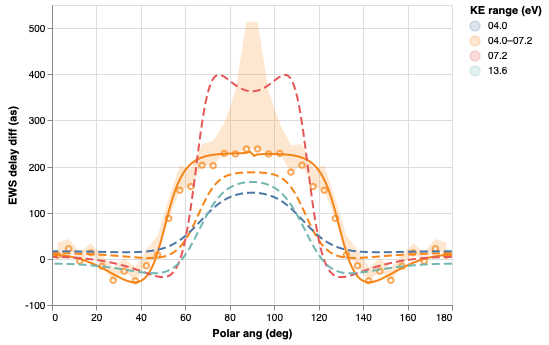

In [4]:
data = pd.read_excel("Data/Ne EWS delay diffs.xlsx", sheet_name=None)

base = alt.Chart(data["Measured"])
(
    base.mark_area(opacity=0.2).encode(
        x="Polar ang (deg)",
        y=alt.Y("EWS delay diff (as)", axis=alt.Axis(title="EWS delay diff (as)")),
        y2="EWS delay diff to (as)",
        color="KE range (eV)",
    )
    + base.mark_point().encode(
        x="Polar ang (deg)",
        y="EWS delay diff (as)",
        color="KE range (eV)",
    )
    + alt.Chart(data["TDCASSCF"]).mark_line().encode(
        x="Polar ang (deg)",
        y="EWS delay diff (as)",
        color="KE range (eV)",
    )
    + alt.Chart(data["Perturb"]).mark_line(strokeDash=[8, 4]).encode(
        x="Polar ang (deg)",
        y="EWS delay diff (as)",
        color="KE range (eV)",
    )
).interactive(bind_x=False)